In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
df = pd.read_csv("epa-sea-level.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [6]:
print(f"Duplicated values: {df.duplicated().values.sum()}")
print(f"NaN values: {df.isna().values.sum()}")

Duplicated values: 0
NaN values: 113


The NaN values correspond to the first 113 entries, which do not have a value for "NOAA Adjusted Sea Level"

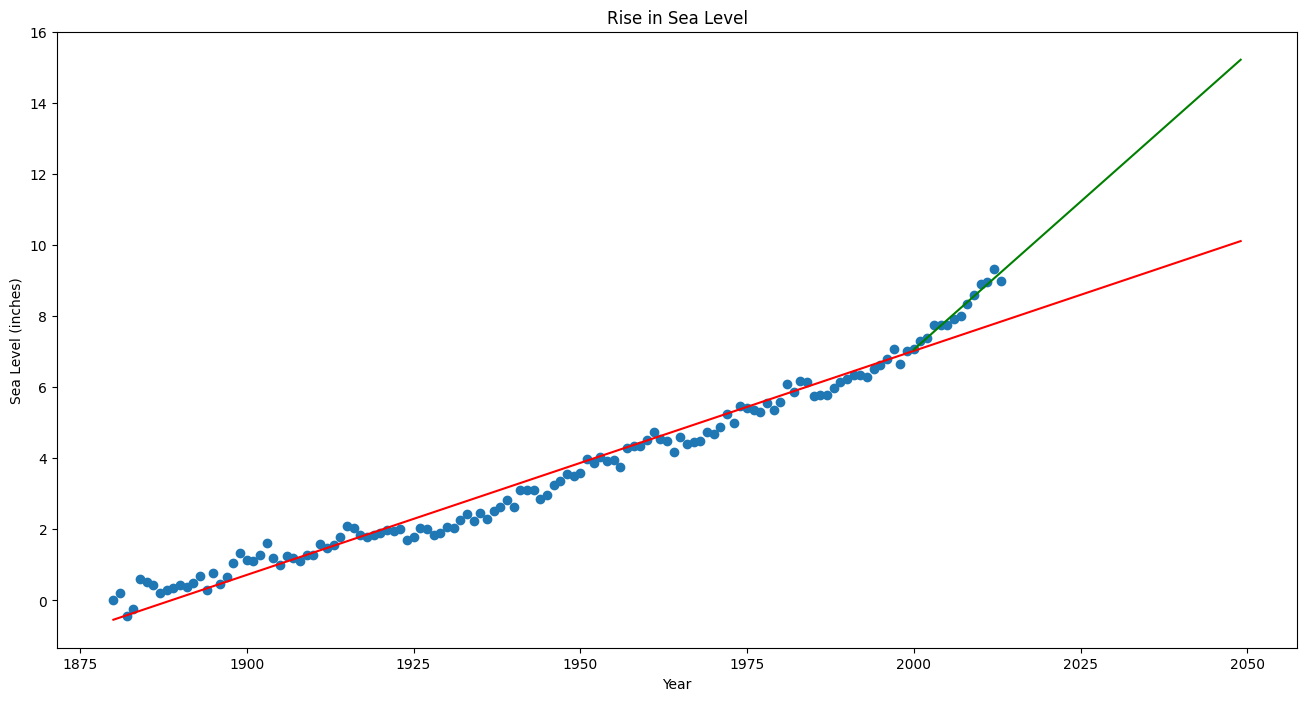

In [22]:
# SCATTER PLOT
# Use matplotlib.
# Use the "Year" column as the x-axis and the 
# "CSIRO Adjusted Sea Level" column as the y-axis
x = df["Year"]
y = df["CSIRO Adjusted Sea Level"]

plt.figure(figsize=(16, 8))
plt.scatter(x, y)

# Create first line of best fit
# USE linregress func from scipy.stats to get the slope and 
# y-intercept of the line of best fit.
# PLOT the line over the top of the scatter plot
# MAKE the line go through the year 2050 to predict sea level rise in 2050
years_extended = np.arange(1880, 2050, 1)

first_result = linregress(x, y)

line = [first_result.slope*year + first_result.intercept for year in years_extended]

plt.plot(years_extended, line, "r")

# Create second line of best fit
# USE the data from year 2000 through the most recent year in the dataset.
# MAKE the line also go through the year 2050 to predict sea level rise
# in 2050 IF the rate of rise continues as it has since 2000
second_df = df[df["Year"] >= 2000]
second_year_extend = np.arange(2000, 2050, 1)

second_result = linregress(second_df["Year"], second_df["CSIRO Adjusted Sea Level"])
second_line = [second_result.slope*year + second_result.intercept for year in second_year_extend]

plt.plot(second_year_extend, second_line, "g")

plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.title("Rise in Sea Level")

plt.show()